In [48]:
import requests
import pandas as pd
import webbrowser
import matplotlib.pyplot as plt

In [49]:



WALLET_ADDRESS = "0x8894E0a0c962CB723c1976a4421c95949bE2D4E3"
ETHERSCAN_API_KEY = "SAFQS5H9P2ZFTW9957KW85UFN4J167B3ZK"

url = f"https://api.etherscan.io/api?module=account&action=txlist&address={WALLET_ADDRESS}&startblock=0&endblock=99999999&sort=asc&apikey={ETHERSCAN_API_KEY}"

#Fetch transaction data
response = requests.get(url)
data = response.json()

#Check if the API returned data
if data["status"] == "1" and len(data["result"]) > 0:
    df = pd.DataFrame(data["result"])
    print("Transactions Fetched Successfully!")
    print(df[["hash", "from", "to", "value", "gasUsed"]].head(10))  # Show first 10 transactions
else:
    print("No transactions found. Check API key or wallet address.")
    exit()

Transactions Fetched Successfully!
                                                hash  \
0  0x4ff3fe30fe7fc9b57809c544d0d2c5c04e258eefb34c...   
1  0xe002de3f736751dfe5836ce35ac51d8ecc814f1cbcca...   
2  0x535bb20d5c3df69a35a919656c2384c497a8b9e5e119...   
3  0x11294aa37d7369f6e1fa9ccec58744f04acbf25e1906...   
4  0x85d8621cdaba700172e07e5e8d1fcb721f74b2959de4...   
5  0xf987ef5e22f26e5e73e8fc31f6b7d21105bb1b7172ce...   
6  0x8718379e89a7afe34445bf43957e1ec20b7366424362...   
7  0x23a36eb85abb21e617cff95ade3b30dfb866208e3f62...   
8  0x1a0577b367a14c6fe3b7f2108150cf25ea610d7b94f9...   
9  0x925e371a1ad4a75dab96c9bf2afa93201982d212820d...   

                                         from  \
0  0x514ef807c8670709e17ef5952134b7c2aa34dbf0   
1  0x3aadb31f8eeaa2f1fbefc3a72ebf0e546fd84d95   
2  0xe4f3971a7bda11d546c2c462b470349931fa0e94   
3  0x30224501af0ec41212ce933d89e505d03e62c670   
4  0x660f24d75f79bdf00ba78c920858ae3e8092b5ca   
5  0x20892df4d56094b291947456ff8d04ea8a706086   
6  0x

In [50]:
# Convert Wei to ETH (1 ETH = 10¹⁸ Wei)
df["value"] = df["value"].astype(float) / 1e18  

# Convert UNIX timestamp to readable date
df["timeStamp"] = pd.to_datetime(df["timeStamp"], unit="s")  

# Keep only necessary columns
df = df[["timeStamp", "from", "to", "value", "gasUsed"]]

# Display cleaned data
print(df.head(10))


            timeStamp                                        from  \
0 2021-07-13 17:54:02  0x514ef807c8670709e17ef5952134b7c2aa34dbf0   
1 2021-09-01 10:37:01  0x3aadb31f8eeaa2f1fbefc3a72ebf0e546fd84d95   
2 2021-09-27 20:28:15  0xe4f3971a7bda11d546c2c462b470349931fa0e94   
3 2021-09-29 13:41:13  0x30224501af0ec41212ce933d89e505d03e62c670   
4 2021-11-03 20:36:45  0x660f24d75f79bdf00ba78c920858ae3e8092b5ca   
5 2021-11-04 07:45:10  0x20892df4d56094b291947456ff8d04ea8a706086   
6 2021-11-13 14:38:05  0x58ff9061c1a022288f84f6854089c10a5c7ed832   
7 2021-12-01 14:57:22  0x6b90d431ece8b4c7314ca4338c75ff68d92e6266   
8 2022-02-01 22:22:10  0x50485b9604d28d93dc1e8cf738ce5cf4586cac4c   
9 2022-02-07 13:43:38  0xa4d739c10790c640c78e4a1e9e5a3acdd44d4d53   

                                           to     value gasUsed  
0  0x8894e0a0c962cb723c1976a4421c95949be2d4e3  0.000000   21560  
1  0x8894e0a0c962cb723c1976a4421c95949be2d4e3  0.005786   21000  
2  0x8894e0a0c962cb723c1976a4421c95949be2d

C:\Users\jojee\AppData\Local\Temp\ipykernel_15224\993297519.py:5: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["timeStamp"] = pd.to_datetime(df["timeStamp"], unit="s")


In [51]:
# Total ETH Sent
total_sent = df[df["from"].str.lower() == WALLET_ADDRESS.lower()]["value"].sum()

# Total ETH Received
total_received = df[df["to"].str.lower() == WALLET_ADDRESS.lower()]["value"].sum()

print(f"Total ETH Sent: {total_sent:.6f} ETH")
print(f"Total ETH Received: {total_received:.6f} ETH")


Total ETH Sent: 0.000000 ETH
Total ETH Received: 1.108140 ETH


In [52]:
# Find top wallets that sent ETH to this whale
top_senders = df[df["to"].str.lower() == WALLET_ADDRESS.lower()]["from"].value_counts().head(10)

# Find top wallets that received ETH from this whale
top_receivers = df[df["from"].str.lower() == WALLET_ADDRESS.lower()]["to"].value_counts().head(10)

print("Top 10 Wallets That Sent ETH to This Address:")
print(top_senders)

print("\n Top 10 Wallets That Received ETH from This Address:")
print(top_receivers)


Top 10 Wallets That Sent ETH to This Address:
from
0xa88902d6e93922893ee77234ed1c3ba4bec90224    2
0x514ef807c8670709e17ef5952134b7c2aa34dbf0    1
0x3aadb31f8eeaa2f1fbefc3a72ebf0e546fd84d95    1
0xe4f3971a7bda11d546c2c462b470349931fa0e94    1
0x660f24d75f79bdf00ba78c920858ae3e8092b5ca    1
0x30224501af0ec41212ce933d89e505d03e62c670    1
0x58ff9061c1a022288f84f6854089c10a5c7ed832    1
0x6b90d431ece8b4c7314ca4338c75ff68d92e6266    1
0x50485b9604d28d93dc1e8cf738ce5cf4586cac4c    1
0x20892df4d56094b291947456ff8d04ea8a706086    1
Name: count, dtype: int64

 Top 10 Wallets That Received ETH from This Address:
to
0xdac17f958d2ee523a2206206994597c13d831ec7    2
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48    1
0x4fabb145d64652a948d72533023f6e7a623c7c53    1
0xdefa4e8a7bcba345f687a2f1456f5edd9ce97202    1
0x8f693ca8d21b157107184d29d398a8d082b38b76    1
0x92d6c1e31e14520e676a687f0a93788b716beff5    1
0x808507121b80c02388fad14726482e061b8da827    1
0x8290333cef9e6d528dd5618fb97a76f268f3edd4    1
0x

In [53]:
import webbrowser

# List of top receiver addresses (Change 'to' to 'from' if checking senders)
top_wallets = [
    "0xdac17f958d2ee523a2206206994597c13d831ec7",  # Example
    "0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48",
    "0x4fabb145d64652a948d72533023f6e7a623c7c53"
]

# Open each address in Etherscan
for wallet in top_wallets:
    webbrowser.open(f"https://etherscan.io/address/{wallet}")


Transactions with the Highest Gas Fees:
             timeStamp                                        from  \
30 2024-01-05 07:37:23  0x8894e0a0c962cb723c1976a4421c95949be2d4e3   
19 2023-05-18 10:38:11  0x8894e0a0c962cb723c1976a4421c95949be2d4e3   
21 2023-05-18 10:40:47  0x8894e0a0c962cb723c1976a4421c95949be2d4e3   
53 2025-02-18 09:32:23  0x8894e0a0c962cb723c1976a4421c95949be2d4e3   
36 2024-04-26 08:58:35  0x8894e0a0c962cb723c1976a4421c95949be2d4e3   
47 2024-12-19 07:54:47  0x8894e0a0c962cb723c1976a4421c95949be2d4e3   
22 2023-05-18 10:42:23  0x8894e0a0c962cb723c1976a4421c95949be2d4e3   
20 2023-05-18 10:39:23  0x8894e0a0c962cb723c1976a4421c95949be2d4e3   
35 2024-03-13 09:05:35  0x8894e0a0c962cb723c1976a4421c95949be2d4e3   
28 2023-10-23 03:33:11  0x8894e0a0c962cb723c1976a4421c95949be2d4e3   

                                            to  value   gasUsed  
30  0x92d6c1e31e14520e676a687f0a93788b716beff5    0.0  169297.0  
19  0xdac17f958d2ee523a2206206994597c13d831ec7    0.0   6

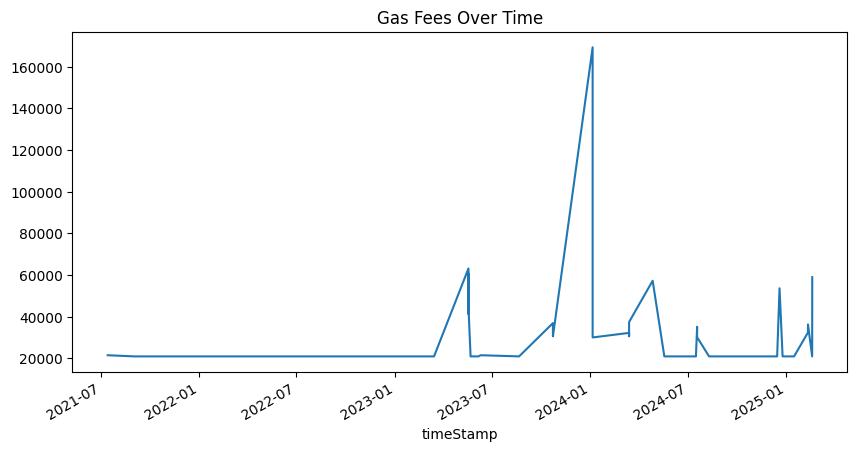

In [54]:
import matplotlib.pyplot as plt

# Convert gasUsed to float
df["gasUsed"] = df["gasUsed"].astype(float)

# Find highest gas fee transactions
high_gas_tx = df.sort_values("gasUsed", ascending=False).head(10)

# Average gas fee per transaction
avg_gas_fee = df["gasUsed"].mean()

print("Transactions with the Highest Gas Fees:")
print(high_gas_tx[["timeStamp", "from", "to", "value", "gasUsed"]])

print(f"\n Average Gas Used Per Transaction: {avg_gas_fee}")

# Plot gas usage trend over time
df.set_index("timeStamp")["gasUsed"].plot(kind="line", title="Gas Fees Over Time", figsize=(10, 5))
plt.show()


Transactions Per Day of the Week:
day_of_week
Wednesday    11
Monday       10
Tuesday       9
Thursday      8
Saturday      8
Friday        5
Sunday        3
Name: count, dtype: int64

 Transactions Per Hour of the Day:
hour_of_day
0     1
1     1
2     1
3     4
4     3
5     1
7     6
8     3
9     6
10    8
11    1
12    2
13    4
14    2
15    1
17    2
19    1
20    3
21    1
22    3
Name: count, dtype: int64


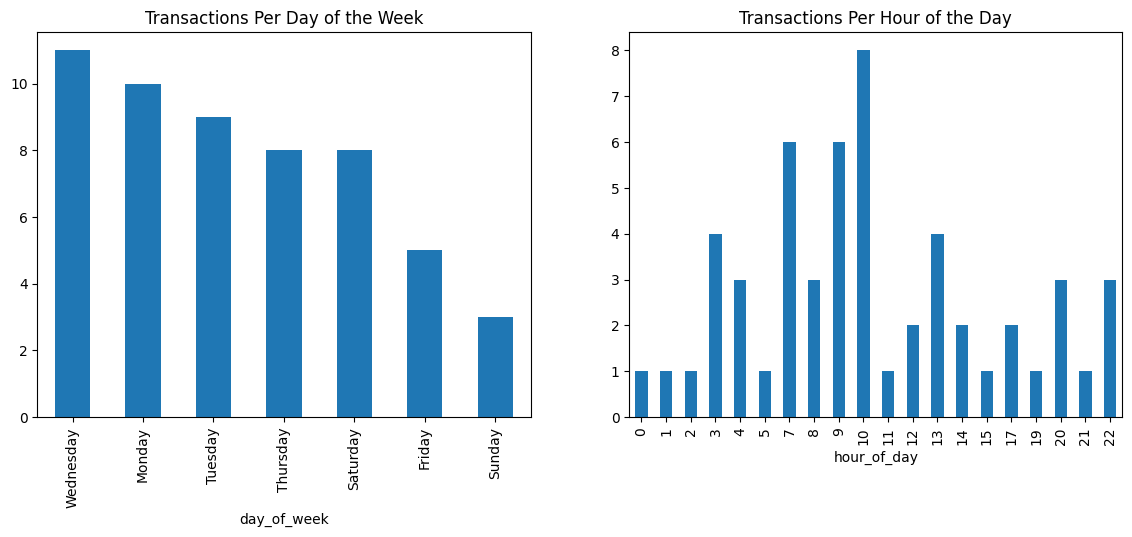

In [55]:
# Extract day of the week and hour of transactions
df["day_of_week"] = df["timeStamp"].dt.day_name()
df["hour_of_day"] = df["timeStamp"].dt.hour

# Count transactions per day of the week
tx_per_day = df["day_of_week"].value_counts()

# Count transactions per hour of the day
tx_per_hour = df["hour_of_day"].value_counts().sort_index()

print("Transactions Per Day of the Week:")
print(tx_per_day)

print("\n Transactions Per Hour of the Day:")
print(tx_per_hour)

# Plot daily and hourly transaction trends
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
tx_per_day.plot(kind="bar", ax=axes[0], title="Transactions Per Day of the Week")
tx_per_hour.plot(kind="bar", ax=axes[1], title="Transactions Per Hour of the Day")
plt.show()


In [56]:
stablecoin_contracts = [
    "0xdac17f958d2ee523a2206206994597c13d831ec7",  # USDT
    "0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48",  # USDC
    "0x4fabb145d64652a948d72533023f6e7a623c7c53"   # BUSD
]

# Check if the whale sent ETH to stablecoin contracts
df_stablecoin_txs = df[df["to"].isin(stablecoin_contracts)]

print("Stablecoin Transactions (ETH Sent to USDT, USDC, BUSD):")
print(df_stablecoin_txs[["timeStamp", "to", "value"]])


Stablecoin Transactions (ETH Sent to USDT, USDC, BUSD):
             timeStamp                                          to  value
19 2023-05-18 10:38:11  0xdac17f958d2ee523a2206206994597c13d831ec7    0.0
20 2023-05-18 10:39:23  0xdac17f958d2ee523a2206206994597c13d831ec7    0.0
21 2023-05-18 10:40:47  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48    0.0
22 2023-05-18 10:42:23  0x4fabb145d64652a948d72533023f6e7a623c7c53    0.0
